<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/02_Images_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 05. Filtering

A képek szűrése alapvető eljárás a digitális képfeldolgozásban. Az alapgondolat az, hogy konvolúciót hajtunk végre a képen. A kép minden egyes részén végigpásztázunk és valamilyen műveletet végzünk az adott régióban. Erről később részletesen, ez most csak szövegkitöltés. Ezen az elven működik az élsimítás, az élkiemelés.

Ebben a példában a  ```skimage.filter``` könyvtár és a ```skimage.morphology``` könyvtár használatával mutatok be néhány példát.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology

## Lineáris szűrők

### 1 Elmosás, vagy élsimítás
Ez az eljárás speciális módon átlagolja az adott képpont és a környezetében lévő képpontokat. Az konvolúciós mátrix Gauss (normál) eloszlást követ. Ez azt jelenti, hogy a képponthoz közeli képpontokat nagyobb súllyal veszi figyelembe mint a távolabbiakat. A súlyok amelyeket a konvolúciónál alkalmazunk Gauss-eloszlást követ. A paraméter általában a konvolúciós mátrix mérete.

Az eljárás eredményét könnyen be lehet mutatni, ha egy kép ahol az összes képpont 0 intenzitású és de egy képpont maximum intenzitású.

Ezen a képen alkalmazva az élsimítást a következő eredményt kapjuk.



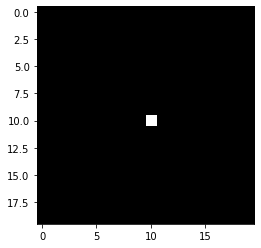

In [ ]:
single_dot = np.zeros((20,20))
single_dot[10,10] = 1
plt.imshow(single_dot, cmap = 'gray');

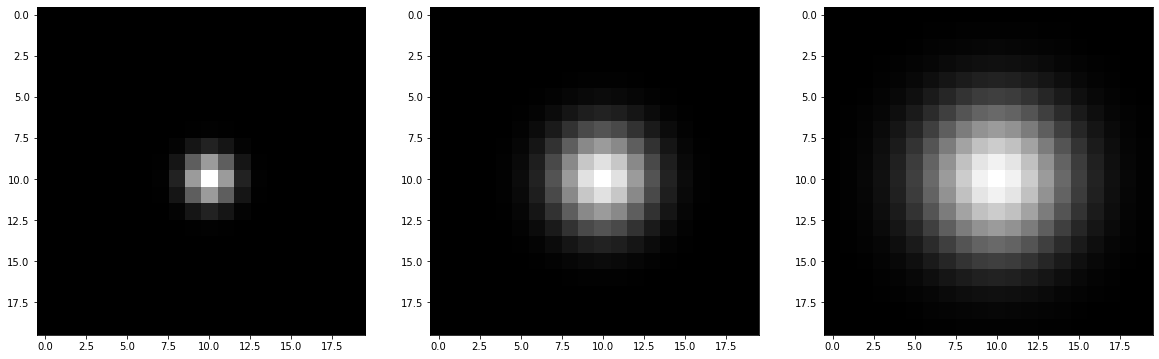

In [ ]:
filtered1 = skimage.filters.gaussian(single_dot, sigma=1)
filtered2 = skimage.filters.gaussian(single_dot, sigma=2)
filtered3 = skimage.filters.gaussian(single_dot, sigma=3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

ax1.imshow(filtered1, cmap = 'gray');
ax2.imshow(filtered2, cmap = 'gray');
ax3.imshow(filtered3, cmap = 'gray');

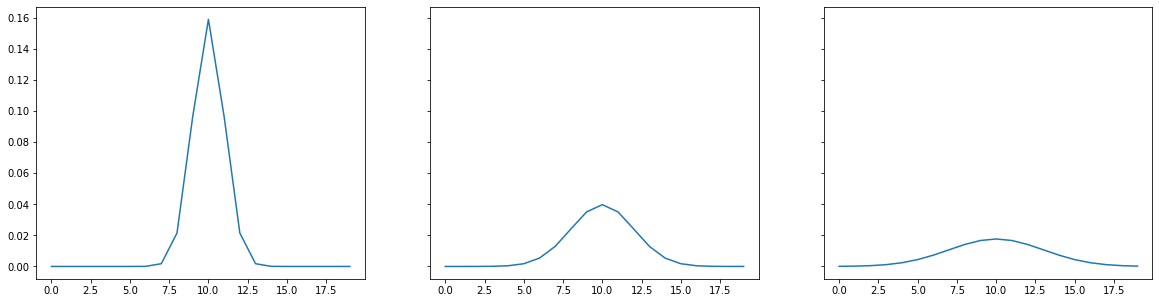

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize = (20, 5))

ax1.plot(filtered1[10,:]);
ax2.plot(filtered2[10,:]);
ax3.plot(filtered3[10,:]);

Fent látható, hogy a különböző méretű élsimítások hatására, hogyan változott meg a képpontok intenzitása és azok gyakorisága.

In [ ]:
image_stack = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')

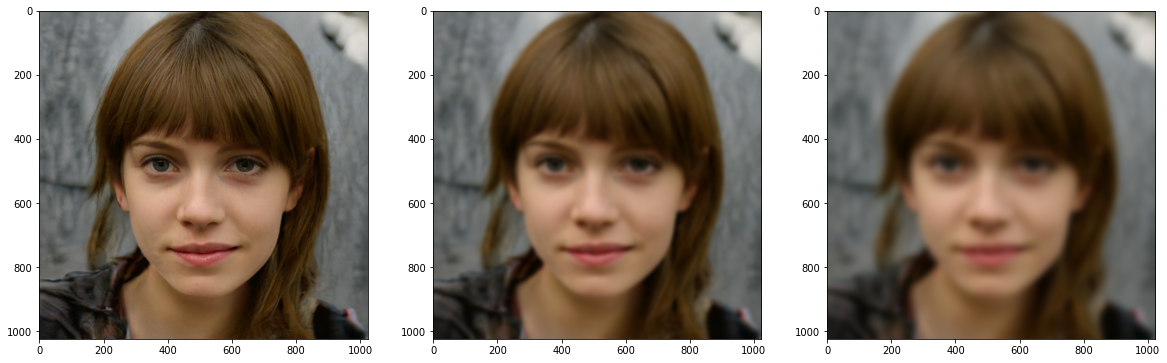

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

blur1 = skimage.filters.gaussian(image_stack, sigma=5, multichannel=True)
blur2 = skimage.filters.gaussian(image_stack, sigma=10, multichannel=True)

ax1.imshow(image_stack);
ax2.imshow(blur1);
ax3.imshow(blur2);

## Zajcsökkentés

Élsimítással gyakran a zajt, az oda nem illő képpontokat is el tudjuk távolítani.
Persze ez a módszer jelentős információvesztéssel jár.

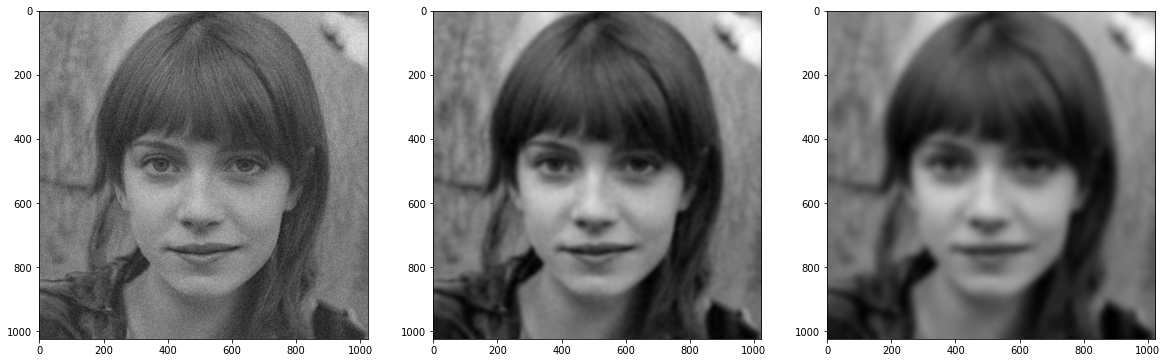

In [ ]:
x = image_stack.shape[0]
y = image_stack.shape[1]

noisy = image_stack[:,:,1] + 100*np.random.rand(x,y)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

ax1.imshow(noisy, cmap = 'gray');
ax2.imshow(skimage.filters.gaussian(noisy, sigma=5), cmap = 'gray');
ax3.imshow(skimage.filters.gaussian(noisy, sigma=10), cmap = 'gray');



## Medián szűrők

A medián szűrő is szomszédos képpontok informáicója alapján végez számítást, például egy 5x5 régióban kiszámolja azt az értéket ami alatt és fölött az esetek fele helyezkedik el és ezt az értéket fogja behelyettesíteni az adott képpontba.

Ez akkor lehet különösen hasznos, ha nagyon kiugró értékek vannak az adott régióban.

In [ ]:
image_noisy = skimage.util.random_noise(image_stack, mode='s&p')

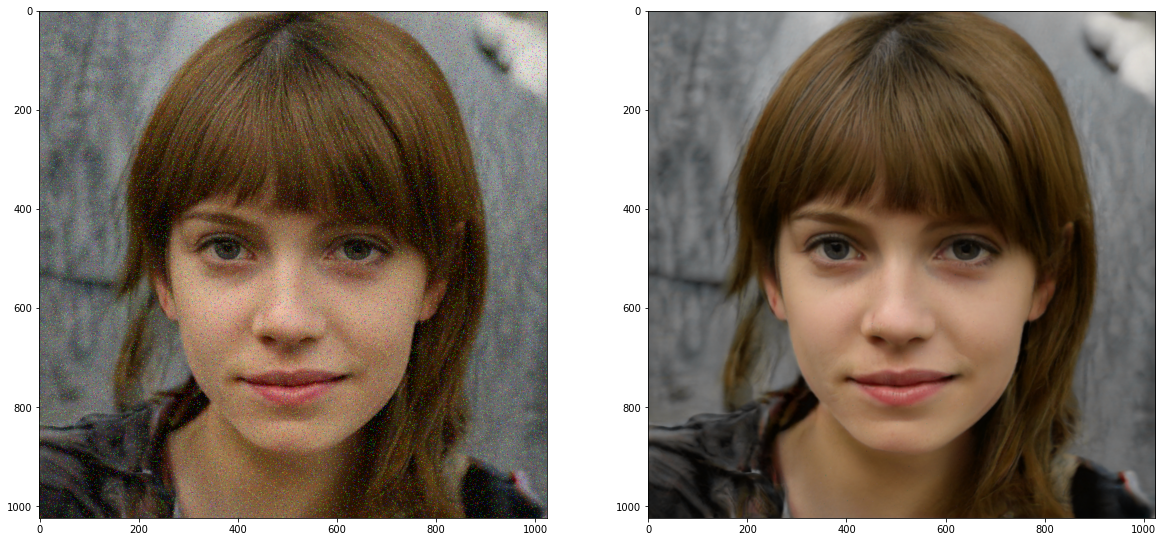

In [ ]:

filtered_median = skimage.filters.median(image_noisy)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.imshow(image_noisy, cmap = 'gray');
ax2.imshow(filtered_median, cmap = 'gray');


A bal oldali képet mesterséges zajjal terheltem, a jobboldali kép pedig ennek a képnek a 3x3 medián szűrővel modosított változata.

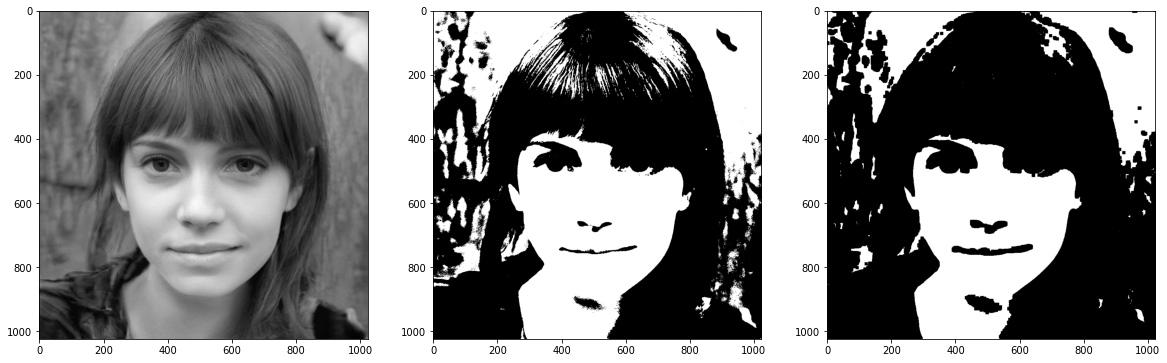

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

r = image_stack[:,:,0]
g = image_stack[:,:,1]
b = image_stack[:,:,2]

mask_r = r > skimage.filters.threshold_otsu(r)
mask_g = g > skimage.filters.threshold_otsu(g)
mask_b = b > skimage.filters.threshold_otsu(b)

eroded = skimage.morphology.binary_erosion(mask_r, selem=np.ones((10,10)))

ax1.imshow(r, cmap = 'gray')
ax2.imshow(mask_r, cmap = 'gray')
ax3.imshow(eroded, cmap = 'gray')

plt.show()


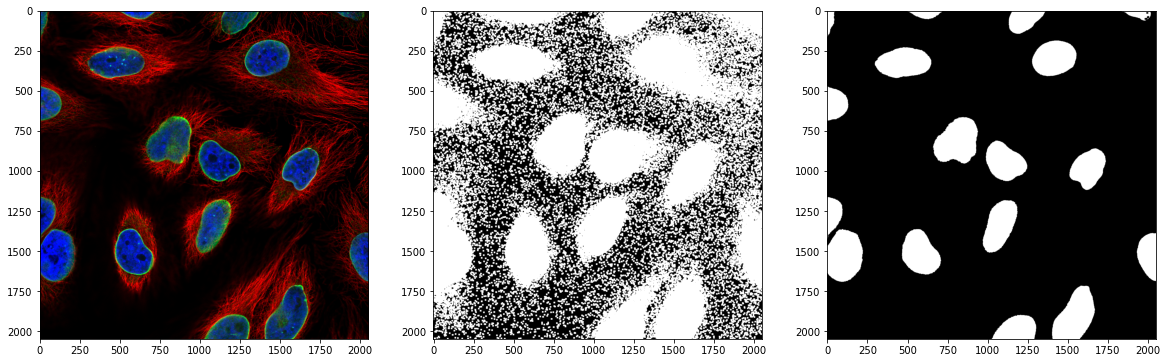

In [ ]:

image_stack = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/nature1.tif?raw=true')
image_nuclei = image_stack[:,:,2]

influence_region = np.ones((10,10))
dilated = skimage.morphology.binary_dilation(image_nuclei, selem=influence_region)
eroded  = skimage.morphology.binary_erosion(image_nuclei, selem=np.ones((10,10)))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

ax1.imshow(image_stack, cmap = 'gray')
ax2.imshow(dilated, cmap = 'gray')
ax3.imshow(eroded, cmap = 'gray')

plt.show()

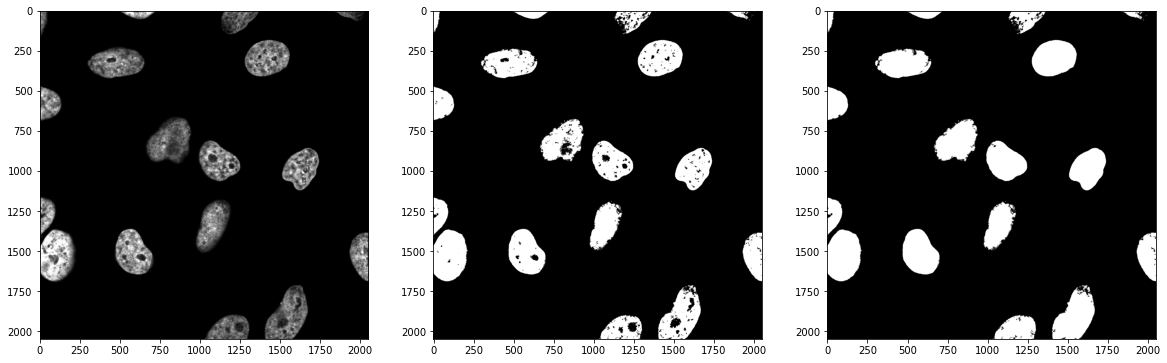

In [ ]:
import scipy.ndimage as ndi

mask = image_nuclei > skimage.filters.threshold_otsu(image_nuclei)

image_closed = skimage.morphology.binary_closing(mask, selem=influence_region)
image_fill   = ndi.binary_fill_holes(image_closed, skimage.morphology.disk(5))


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

ax1.imshow(image_nuclei, cmap = 'gray')
ax2.imshow(image_closed, cmap = 'gray')
ax3.imshow(image_fill, cmap = 'gray')

plt.show()